# Seattle Bike Traffic Prediction

## Datasets
### Source: 
- Fremont Bridge data

! curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

- Weather data

http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND


Clean Dataset: [https://github.com/subashgandyer/datasets/blob/main/seattle_bike_data.csv]

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('data/seattle_bike_data.csv', index_col=0, parse_dates=True)
df.head(5)

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [4]:
df.dtypes

Date                object
TotalBikesCount    float64
Mon                  int64
Tue                  int64
Wed                  int64
Thu                  int64
Fri                  int64
Sat                  int64
Sun                  int64
holiday              int64
DayLightHrs        float64
AvgTempInC         float64
PRCP_IN            float64
DryDay               int64
YearsCount         float64
dtype: object

### Convert Date into Pandas Date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
TotalBikesCount           float64
Mon                         int64
Tue                         int64
Wed                         int64
Thu                         int64
Fri                         int64
Sat                         int64
Sun                         int64
holiday                     int64
DayLightHrs               float64
AvgTempInC                float64
PRCP_IN                   float64
DryDay                      int64
YearsCount                float64
dtype: object

In [6]:
df

,Date,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
0,2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
1,2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2,2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
3,2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
4,2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,2018-06-26,4771.0,0,1,0,0,0,0,0,0,15.769483,6.30,0.0,1,5.731507
2093,2018-06-27,4942.0,0,0,1,0,0,0,0,0,15.763178,6.05,0.0,1,5.734247
2094,2018-06-28,4387.0,0,0,0,1,0,0,0,0,15.755520,6.10,0.0,1,5.736986
2095,2018-06-29,4919.0,0,0,0,0,1,0,0,0,15.746518,6.35,0.0,1,5.739726


### Set Date as index

In [7]:
df = df.set_index('Date')
df.head(5)

,TotalBikesCount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,DayLightHrs,AvgTempInC,PRCP_IN,DryDay,YearsCount
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0,0,1,0,0,0,0,0,11.277359,5.60,0.0,1,0.000000
2012-10-04,3475.0,0,0,0,1,0,0,0,0,11.219142,5.65,0.0,1,0.002740
2012-10-05,3148.0,0,0,0,0,1,0,0,0,11.161038,5.95,0.0,1,0.005479
2012-10-06,2006.0,0,0,0,0,0,1,0,0,11.103056,6.05,0.0,1,0.008219
2012-10-07,2142.0,0,0,0,0,0,0,1,0,11.045208,6.05,0.0,1,0.010959


In [8]:
df.shape

(2097, 14)

In [9]:
df.columns

Index(['TotalBikesCount', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay',
       'YearsCount'],
      dtype='object')

### Split into X and y

In [11]:
indep_cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
       'holiday', 'DayLightHrs', 'AvgTempInC', 'PRCP_IN', 'DryDay','YearsCount']
X = df[indep_cols]
y = df['TotalBikesCount']
X.shape, y.shape

((2097, 13), (2097,))

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [13]:
predictions = model.predict(X)
predictions

array([3509.10208841, 3375.37680672, 3171.1559462 , ..., 4294.78165878,
       4075.72089562, 2626.74466652])

In [14]:
df1= df[['TotalBikesCount']].copy()
df1['Predictions'] = predictions
df1.head(5)

,TotalBikesCount,Predictions
Date,,
2012-10-03,3521.0,3509.102088
2012-10-04,3475.0,3375.376807
2012-10-05,3148.0,3171.155946
2012-10-06,2006.0,1859.059961
2012-10-07,2142.0,1776.258124


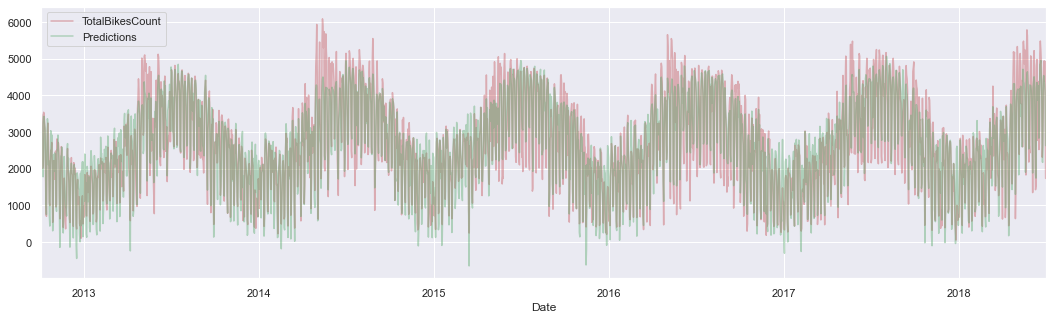

In [15]:
import datetime as dt
df1.plot(alpha=0.4, figsize=(18,5), color=['r','g'])
plt.legend(loc='upper left')
plt.show()
# If x-axis doesn't show years, 
# make sure the 'Date' column was converted to datetime from String, 
# before it was set as index

In [16]:
model.coef_

array([-6.54065823e+02, -5.26114967e+02, -5.40396337e+02, -6.88055804e+02,
       -1.00778818e+03, -2.35415766e+03, -2.43062192e+03, -1.20007497e+03,
        1.11462695e+02,  4.06258710e+02, -1.75737653e+05,  5.17444792e+02,
        4.02758119e+01])

In [17]:
coeffs = pd.Series(model.coef_, index=x.columns)
coeffs

Mon              -654.065823
Tue              -526.114967
Wed              -540.396337
Thu              -688.055804
Fri             -1007.788184
Sat             -2354.157663
Sun             -2430.621920
holiday         -1200.074973
DayLightHrs       111.462695
AvgTempInC        406.258710
PRCP_IN       -175737.652995
DryDay            517.444792
YearsCount         40.275812
dtype: float64

### Observations / Insights ???

In [18]:
from sklearn.utils import resample
model.fit(X, y)
print('model.coef_',model.coef_)
model.fit(*resample(X, y))
print('model.coef_',model.coef_)
model.fit(*resample(X, y))
print('model.coef_',model.coef_)
print('Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?')


temp = np.asarray([
                [1,1,2,3,4], # 1st row
                [2,6,7,8,9], # 2nd row
                [3,6,7,8,9], # 3rd row
                [4,6,7,8,9], # 4th row
                [5,6,7,8,9]  # 5th row
              ])
print('temp :',temp)
print('temp resampled :',resample(temp))
print('Resampled data is different and seems close to the original one. And now you know why the coefficients are different.')

model.coef_ [-6.54065823e+02 -5.26114967e+02 -5.40396337e+02 -6.88055804e+02
 -1.00778818e+03 -2.35415766e+03 -2.43062192e+03 -1.20007497e+03
  1.11462695e+02  4.06258710e+02 -1.75737653e+05  5.17444792e+02
  4.02758119e+01]
model.coef_ [-7.79061219e+02 -6.49853880e+02 -6.68819471e+02 -8.05986149e+02
 -1.18305039e+03 -2.37683403e+03 -2.50097282e+03 -1.40768824e+03
  1.05929034e+02  4.38932679e+02 -1.73940958e+05  5.02182207e+02
  3.82046791e+01]
model.coef_ [-6.82684777e+02 -6.28769201e+02 -5.76177085e+02 -7.40079733e+02
 -9.65667234e+02 -2.39261374e+03 -2.45332014e+03 -1.28469626e+03
  1.11977625e+02  4.08122131e+02 -1.70291166e+05  5.48684693e+02
  3.89874626e+01]
Why are the  coefficients different with data resampling/shuffling? Only the order of the data is changed and not the data itself, right?
temp : [[1 1 2 3 4]
 [2 6 7 8 9]
 [3 6 7 8 9]
 [4 6 7 8 9]
 [5 6 7 8 9]]
temp resampled : [[1 1 2 3 4]
 [5 6 7 8 9]
 [5 6 7 8 9]
 [4 6 7 8 9]
 [1 1 2 3 4]]
Resampled data is different and

In [19]:
from sklearn.utils import resample
np.random.seed(1)
coeffs_tmp = [model.fit(*resample(X, y)).coef_ for i in range(1000)]
err = np.std(coeffs_tmp,0) #Columnar STD

In [20]:
# With these errors estimated, let's again look at the results:
print(pd.DataFrame({'effect': coeffs.round(0),
                    'error': err.round(0)}))

               effect    error
Mon            -654.0     66.0
Tue            -526.0     69.0
Wed            -540.0     67.0
Thu            -688.0     67.0
Fri           -1008.0     66.0
Sat           -2354.0     64.0
Sun           -2431.0     64.0
holiday       -1200.0    114.0
DayLightHrs     111.0      7.0
AvgTempInC      406.0     16.0
PRCP_IN     -175738.0  11018.0
DryDay          517.0     25.0
YearsCount       40.0      6.0
